# Data Analysis Homework 1

In [2]:
from __future__ import division
from IPython.display import HTML
from IPython.display import display
from scipy.special import erf
from scipy.special import erfc
from math import factorial as factorial
from random import seed
from random import randint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Question 1: Mean, Standard Deviation and Standard Error

8 measurements of the sensitivity of a photo diode circuit (in Amps/Watt) are: 
<br>
25.8, 26.2, 26.0, 26.5, 25.8, 26.1, 25.8, and 26.3. 
<br>
Calculate:
<br>
(i) The Mean.
<br>
(ii) The Standard Deviation.
<br>
(iii) The Standard Error.
<br>
(iv) How would you report the result?

### (i) Calculate the Mean

In [3]:
data = [25.8, 26.2, 26., 26.5, 25.8, 26.1, 25.8, 26.3]

def one_i(data):
    '''Return the mean'''
    mean = np.mean(data)

    return mean

# Please print output of functions to make marking easier
one_i(data)

26.0625

### (ii) Calculate the sample Standard Deviation.

In [4]:
data = [25.8, 26.2, 26., 26.5, 25.8, 26.1, 25.8, 26.3]

def one_ii(data):
    '''Return the standard deviation'''
    standard_deviation = np.std(data,ddof = 1)

    return(standard_deviation)
    
one_ii(data)

0.26152028055746845

### (iii) Calculate the Standard Error.

In [5]:
data = [25.8, 26.2, 26., 26.5, 25.8, 26.1, 25.8, 26.3]

def one_iii(data):
    '''Return the standard error'''
    st_dev = one_ii(data)
    n = len(data)
    standard_error = st_dev/np.sqrt(n)

    return(standard_error)

one_iii(data)

0.09246138189999717

### (iv) How would you report the result?

The sensitivity of the photo diode is 26.06 $\pm$ 0.09 Amps/Watt (only quote the error to one significant figure)

## Question 2: Error in the error

Consider a set of measurements with the standard error calculated to be $\alpha=0.987654321$.  Here we address the question of how many significant figures should be quoted.  

Required:
<blockquote>

(i) Using pandas or any other software package, make a CSV file with four columns.  The first column should be $N$, the number of measurements on which $\alpha$ is based.  In the second column write $\alpha$ to the nine significant figures quoted above. The third and fourth columns should be ${\displaystyle \alpha\left(1-\frac{1}{\sqrt{2N-2}}\right)}$    and  ${\displaystyle \alpha\left(1+\frac{1}{\sqrt{2N-2}}\right)}$, respectively.  As we are interested in the variation over a large dynamic range, choose values for $N$ such as 2, 3, 5, 10, 20, 30, etc. 
<bf>
(ii) Verify the statement from Section 2.7.1 that the number of data points,  N , needs to approach a few tens of thousands before the second significant figure in the error can be quoted, i.e. when the values in the three columns become equal to the second significant figure. Use the model that you constructed in the previous part of the question and make appropiate comments using data
<bf>
(iii) Repeat the analysis for the case where α=0.123456789, i.e. the first significant digit of the error is 1. Make appropiate comments.
<bf>
(iv) How many data points must be collected before the third significant figure can be quoted?

### (i) Using pandas or any other software package, make a CSV file with four columns.  The first column should be $N$, the number of measurements on which $\alpha$ is based.  In the second column write $\alpha$ to the nine significant figures quoted above. The third and fourth columns should be ${\displaystyle \alpha\left(1-\frac{1}{\sqrt{2N-2}}\right)}$    and  ${\displaystyle \alpha\left(1+\frac{1}{\sqrt{2N-2}}\right)}$, respectively.  As we are interested in the variation over a large dynamic range, choose values for $N$ such as 2, 3, 5, 10, 20, 30, etc. 

In [9]:
# Note: this is one way in which this can be done efficiently, although there are many other ways
# of coding the solution

N_range = np.logspace(1,10, base=5, num=10).astype(int)
alpha = 0.987654321*np.ones(len(N_range))

def make_dataframe(N_range, alpha, outname):
    'Creates a pandas dataframe and saves the output as a csv file given a range of N values, and a given alpha'
    
    plus_fn = lambda N: 1+(1/np.sqrt(2*N - 2))
    minus_fn = lambda N: 1-(1/np.sqrt(2*N - 2))
    
    # Note: using the numpy library where possible is often a good idea since it has in-build
    # automatic parallelisation. By mapping a lambda function over a numpy array the same operation
    # can be carried out on each element very efficiently.
    
    alpha_plus = alpha*plus_fn(N_range)
    alpha_minus = alpha*minus_fn(N_range)
    
    ### these two columns are not needed, I've added them here to make the model solution clearer ###
    alpha_plus_3 = np.round(alpha_plus, 3)
    alpha_minus_3 = np.round(alpha_minus, 3)
    
    # create dictionary
    data = {'N':N_range, 'alpha': alpha, 'alpha minus': alpha_minus, 'alpha plus': alpha_plus, 'ap_r':alpha_plus_3, 'am_r':alpha_minus_3}
    
    # create dataframe from dictionary
    df = pd.DataFrame(data)
    df.to_csv(outname)
    
    return df

df = make_dataframe(N_range, alpha, 'two_i.csv')

df

,N,alpha,alpha minus,alpha plus,ap_r,am_r
0,5,0.987654,0.638466,1.336843,1.337,0.638
1,25,0.987654,0.845099,1.130210,1.130,0.845
2,125,0.987654,0.924938,1.050370,1.050,0.925
3,625,0.987654,0.959697,1.015612,1.016,0.960
4,3125,0.987654,0.975159,1.000149,1.000,0.975
5,15625,0.987654,0.982067,0.993242,0.993,0.982
6,78125,0.987654,0.985156,0.990153,0.990,0.985
7,390625,0.987654,0.986537,0.988772,0.989,0.987
8,1953125,0.987654,0.987155,0.988154,0.988,0.987
9,9765625,0.987654,0.987431,0.987878,0.988,0.987


### (ii) Verify the statement from Section 2.7.1 that the number of data points,  N , needs to approach a few tens of thousands before the second significant figure in the error can be quoted, i.e. when the values in the three columns become equal to the second significant figure. Use the model that you constructed in the previous part of the question and make appropiate comments using data

From the table above it can be seen that the numbers in the final 3 columns only begin to agree to the second significant figure at ~ N = 70000 (more than 50000)

### (iii) Repeat the analysis for the case where  α=0.123456789, i.e. the first significant digit of the error is 1. Make appropiate comments.

In [10]:
N_range = np.logspace(1,10, base=5, num=10).astype(int)
alpha = 0.123456789*np.ones(len(N_range))

df = make_dataframe(N_range, alpha, 'two_ii.csv')
df

,N,alpha,alpha minus,alpha plus,ap_r,am_r
0,5,0.123457,0.079808,0.167105,0.167,0.080
1,25,0.123457,0.105637,0.141276,0.141,0.106
2,125,0.123457,0.115617,0.131296,0.131,0.116
3,625,0.123457,0.119962,0.126951,0.127,0.120
4,3125,0.123457,0.121895,0.125019,0.125,0.122
5,15625,0.123457,0.122758,0.124155,0.124,0.123
6,78125,0.123457,0.123144,0.123769,0.124,0.123
7,390625,0.123457,0.123317,0.123596,0.124,0.123
8,1953125,0.123457,0.123394,0.123519,0.124,0.123
9,9765625,0.123457,0.123429,0.123485,0.123,0.123


It can be seen from the table above that the values of the final 3 columns agree to two significant figures at only ~ N = 15000

### (iv) How many data points must be collected before the third significant figure can be quoted?

In [11]:
# From the above table the point at which the numbers agree to three significant figures is somewhere
# between ~ 2000000 and 9500000. I therefore ajust my search range in to this region

N_range = np.logspace(9,10, base=5, num=10).astype(int)
alpha = 0.123456789*np.ones(len(N_range))

df = make_dataframe(N_range, alpha, 'two_iv.csv')
df

,N,alpha,alpha minus,alpha plus,ap_r,am_r
0,1953125,0.123457,0.123394,0.123519,0.124,0.123
1,2335572,0.123457,0.123400,0.123514,0.124,0.123
2,2792908,0.123457,0.123405,0.123509,0.124,0.123
3,3339796,0.123457,0.123409,0.123505,0.124,0.123
4,3993772,0.123457,0.123413,0.123500,0.124,0.123
5,4775806,0.123457,0.123417,0.123497,0.123,0.123
6,5710972,0.123457,0.123420,0.123493,0.123,0.123
7,6829255,0.123457,0.123423,0.123490,0.123,0.123
8,8166513,0.123457,0.123426,0.123487,0.123,0.123
9,9765625,0.123457,0.123429,0.123485,0.123,0.123


It can be seen from the table above that the final 3 columns agree to three significant figures at ~ N = 4700000

## Question 3: Confidence limits for a Gaussian Distribution

|Centred on Mean | Measurements within range | Measurements outside range |
| --- | --- | --- |
| $\pm\sigma$ | 68% | 32% |
| $\pm1.65\sigma$ | 90% | 10% |
| $\pm2\sigma$ | 95% | 5% |
| $\pm2.58\sigma$ | 99% | 1% |
| $\pm3\sigma$ | 99.7% | 0.3% |

(i) Verify the results of the above table for the fraction of the data which lies within different ranges of a Gaussian probability distribution function. 
<bf>
(ii) What fraction of the data lies outside the following ranges from the mean? 
<blockquote>
<bf>
(a) $\pm4\sigma$ 
<bf>
(b) $\pm5\sigma$.  
</blockquote>

(iii) What is the (symmetric) range within which the following fractions of the data lie, leaving your answer in terms of $\sigma$? 
<blockquote>
<bf>
(a) 50% 
<bf>
(b) 99.9%.

### (i) Verify the results of the above table for the fraction of the data which lies within different ranges of a Gaussian probability distribution function. You must return your answers as an ARRAY OF PERCENTAGES.

In [8]:
def three_i():
    '''Return the measurements in range as an array. '''
    
    measurements_in_range = []
    sigma_multiples = [1,1.65,2,2.58,3]
    mean = 10
    st_dev = 3
    
    for i in sigma_multiples:
        x_1 = ((mean+(i*st_dev))-mean)/((np.sqrt(2)*st_dev))
        x_2 = ((mean-(i*st_dev))-mean)/((np.sqrt(2)*st_dev))
        measurements_element = (0.5*(1+erf(x_1)))-(0.5*(1+erf(x_2)))
        measurements_in_range.append(measurements_element*100)
    
    return measurements_in_range

three_i()

[68.26894921370858,
 90.10570639327038,
 95.44997361036415,
 99.01199684844588,
 99.73002039367398]

### (ii) What fraction of the data lies outside the following ranges from the mean? You must return your answer as a PERCENTAGE.
<blockquote>
<bf>
(a) $\pm4\sigma$ 
    
<bf>
(b) $\pm5\sigma$.  
</blockquote>


In [9]:
def three_iia():
    '''Return the fraction of measurements outside the range as a PERCENTAGE'''
    
    mean = 10
    st_dev = 3
    x_1 = ((mean+(4*st_dev))-mean)/((np.sqrt(2)*st_dev))
    x_2 = ((mean-(4*st_dev))-mean)/((np.sqrt(2)*st_dev))
    four_sigma = (0.5*(1+erf(x_1)))-(0.5*(1+erf(x_2)))
    outside_range = (1-four_sigma)*100
    
    return outside_range
   

def three_iib():
    '''Return the fraction of measurements outside the range as a PERCENTAGE'''
    
    mean = 10
    st_dev = 3
    x_1 = ((mean+(5*st_dev))-mean)/((np.sqrt(2)*st_dev))
    x_2 = ((mean-(5*st_dev))-mean)/((np.sqrt(2)*st_dev))
    five_sigma = (0.5*(1+erf(x_1)))-(0.5*(1+erf(x_2)))
    outside_range = (1-five_sigma)*100
    
    return outside_range

three_iia(), three_iib()

(0.006334248366623996, 5.733031436250258e-05)

### (iii) What is the (symmetric) range within which the following fractions of the data lie, leaving your answer in terms of $\sigma$?
<blockquote>
<bf>
(a) 50% 
<bf>
(b) 99.9%.

In [10]:
def phi(x):
    'Cumulative distribution function for the standard normal distribution'
    # Note: this function is needed to account for the difference
    # in error function definitions between Huges and Hayes and the
    # scipy library
    return (1.0 + erf(x / np.sqrt(2.0))) / 2.0

In [11]:
def three_iiia():
    '''Return the multiple of sigma'''
    
    test_range = np.arange(0,10,0.001)
    for i in test_range:
        solution = i
        if phi(i)-phi(-i) > 0.5:
            break
    
    return solution
    

def three_iiib():
    '''Return the multiple of sigma'''
    
    test_range = np.arange(0,10,0.001)
    for i in test_range:
        solution = i
        if phi(i)-phi(-i) > 0.999:
            break
    return solution

three_iiia(), three_iiib()

(0.675, 3.291)

## Question 4: Identifying a Potential Outlier

Seven successive measurements of the charge stored on a capacitor (all in $\mu C$) are: 
<bf>
45.7, 53.2, 48.4, 45.1, 51.4, 62.1 and 49.3. 
<bf>
The sixth reading appears anomalously large. 

Required:
<blockquote>
(i) Apply Chauvenet’s criterion to ascertain whether this data point should be rejected. In the comment, you must state 'ACCEPT' or 'REJECT'. 
</blockquote>
<blockquote>
(ii) Having decided whether to keep 6 or 7 data points, calculate:
<bf>
<blockquote>
(a) The Mean
</blockquote>
<bf>
<blockquote>
(b) Standard Deviation
</blockquote>
<bf>
<blockquote>
(c) Error of the Charge.

### (i) Apply Chauvenet’s criterion to ascertain whether this data point should be rejected. In the comment, you must state 'ACCEPT' or 'REJECT'. 

In [12]:
def four_i():
    '''Your function must return the probability of an outlier, n_out and your comment to ACCEPT or REJECT'''
    
    data = [45.7, 53.2, 48.4, 45.1, 51.4, 62.1, 49.3]
    
    suspicious_position = 5 # position in the data point array of suspicious result
    
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    
    # select the upper and lower bounds of the error function integral
    x_1 = mean - data[suspicious_position]
    x_2 = mean + data[suspicious_position]
    
    P_out = 1 - (phi(x_2/std) - phi(x_1/std)) # probability of finding a value outside the bounds
    # note: the error function assumes a standard deviation of 1 and so the upper and lower bounds
    # must be divided by the standard deviation - see definintion of error function and it's scipy implementation
    n_out = P_out*len(data)
    
    comment = 'ACCEPT'
    if n_out < 0.5:
        comment = 'REJECT'
        
    return P_out, n_out, comment

four_i()

(0.02466922732306953, 0.17268459126148672, 'REJECT')

### (iia) Having decided whether to keep 6 or 7 datapoints, calculate the mean.

In [13]:
def four_iia():
    '''Your function should return the mean'''
    data_points_1 = [45.7, 53.2, 48.4, 45.1, 51.4, 49.3]
    mean = np.mean(data_points_1)
    return mean

four_iia()

48.85

### (iib) Having decided whether to keep 6 or 7 datapoints, calculate the standard deviation.

In [14]:
def four_iib():
    '''Your function should return the standard deviation'''

    data_points_2 = [45.7, 53.2, 48.4, 45.1, 51.4, 49.3]
    standard_deviation = np.std(data_points_2,ddof = 1)
    return standard_deviation

four_iib()

3.1564220250150323

### (iic) Having decided whether to keep 6 or 7 datapoints, calculate the standard error.

In [15]:
def four_iic():
    '''Your function should return the standard error'''

    data_points_3 = np.array([45.7, 53.2, 48.4, 45.1, 51.4, 49.3])
    st_dev = four_iib()
    standard_error = st_dev/(np.sqrt(len(data_points_3)))
    
    return standard_error

four_iic()

1.2886038956948718

## Question 5: Poisson and Gaussian

Required:
<bf>
<blockquote>
(i) Plot a histogram of a Poisson distribution with mean 35.  
<bf>
</blockquote>
<blockquote>
(ii) Using the same axes plot the continuous function of a Gaussian with a mean of 35, and standard deviation $\sqrt{35}$.  
</blockquote>
<bf>
<blockquote>
(iii) Comment on the similarities and differences between the distributions.

### (i) Plot a histogram of a Poisson distribution with mean 35.  
<bf>
### (ii) Using the same axes plot the continuous function of a Gaussian with a mean of 35, and standard deviation $\sqrt{35}$. 

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


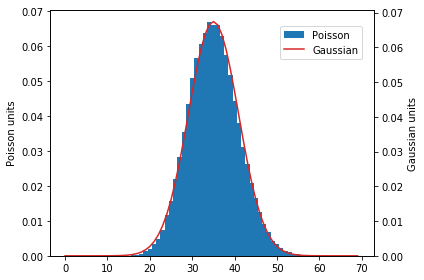

In [16]:
def five_i_and_ii():
    '''This function should plot the appropiate histograms'''

    mean = 35
    
    fig, ax1 = plt.subplots()
    
    # Poisson distribution
    poisson_data = np.random.poisson(lam=35,size=100000)
    color = 'tab:blue'
    # plot normalised histogram with integer bins
    # in order to avoid the bins beginning on the integers, the bins are shifted by 0.5
    ax1.hist(poisson_data, density=True, bins = np.arange(0.5,70.5), label = 'Poisson', color=color)
    ax1.set_ylabel('Poisson units')
    ax1.set_ylim(0)
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    # Gaussian distribution
    st_dev = np.sqrt(35)
    gaussian = lambda i: (1/(st_dev*np.sqrt(2*np.pi)))*np.exp((-(i-mean)**2)/(2*st_dev**2))
    data = np.arange(0,70) # range over which the Gaussian will be plotted
    gaussian_data = gaussian(data)
    color = 'tab:red'
    ax2.plot(data, gaussian_data, label = 'Gaussian', color=color)
    ax2.set_ylabel('Gaussian units')
    ax2.set_ylim(0)
    
    fig.legend(bbox_to_anchor=(0.45, 0.4, 0.4, 0.5)) # set location of legend
    fig.tight_layout()
    fig.show()
    
five_i_and_ii()

### (iii) Comment on the similarities and differences between the distributions.

Similarities:
- Same height peak
- Same general distribution shape at a large number of points (note the apparent shift of the Poisson distribution to the left is due to the fact that the Poisson distribution takes cannot accept negative numbers and will therefore naturally by skewed to the left)

Differences:
- The Gaussian distribution is continuous, whereas the Poisson is discrete
- The Poisson distribution only extends over non-negative integers, whereas the Gaussian distribution extents over all real numbers
- The Poisson distribution has a natural left skewness as mentioned above, although the result tends to a Gaussian as you add more points

## Coding Exercise

Choose one of the distributions we discussed in the context of the Central Limit theorem: either the uniform distribution, the triangular distribution or a Gaussian distribution. They should span the interval 0 to 1.
<bf>
Write code that allows you to choose numbers at random from this distribution. Then,

<blockquote>
<bf>
(i) Choose 1,000 numbers at random, and plot a histogram of their occurrences.
</blockquote>
<bf>
<blockquote>
(ii) Choose 2 numbers from  the distribution at random, and average them.  Repeat this 1,000 times and plot a histogram.
<bf>
</blockquote>
<blockquote>
(iii) Do the same for the sum of 3, 4 and 5 numbers, and make the corresponding plots.
<bf>
</blockquote>
<blockquote>
(iv) Comment on your results.

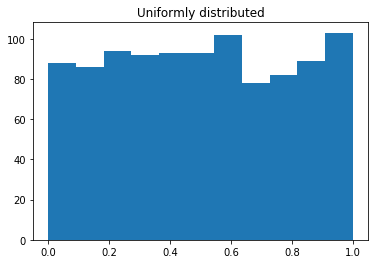

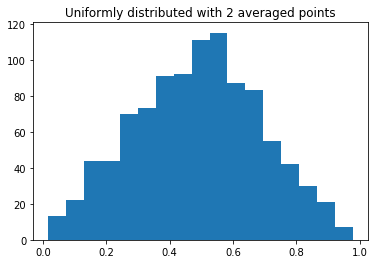

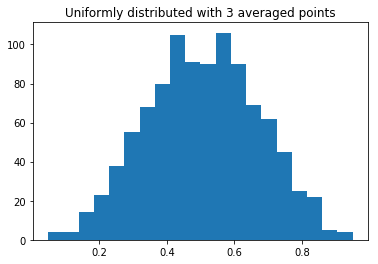

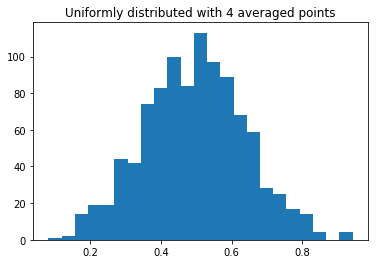

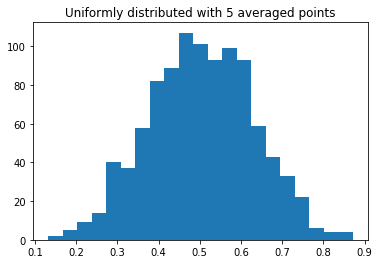

In [18]:
data = np.random.uniform(size = 1000)

def averaging(data, num_to_average):
    data = np.array(data) # ensure data is in a numpy array format
    averaged_data = []
    for i in range(1000):
        # select the desired number of indices at random to determine the position the elements to be averaged
        indices = np.random.randint(0, len(data), size=num_to_average)
        averaged_data.append(np.mean(data[indices]))
    return averaged_data

plt.hist(data, bins='auto')
plt.title('Uniformly distributed')
plt.show()

plt.figure()
nums_to_average = [2,3,4,5]

for i in nums_to_average:
    averaged_data = averaging(data,i)
    plt.hist(averaged_data, bins='auto')
    plt.title('Uniformly distributed with {} averaged points'.format(i))
    plt.show()

### (iv) Comment on your results.

The distribution increasingly approaches a normal distribution as more points are averaged over. This is a consequence of the Central Limit Theorem.